# Ensemble Learning: Bagging, Boosting, Stacking and Max Voting Examples

For this example, we will use the already known dataset <em>titanic.csv</em>. Our goal is to predict which passengers survived the Titanic shipwreck.

We have used Logistic Regression in this context; now, we are going to try a few ensemble learning models.

## The Data

It will be used data frame with 891 observations on the following 12 variables:

* **PassengerId**
* **Survival** - 0 = No, 1 = Yes
* **Pclass** - Ticket class; 1 = 1st class, 2 = 2nd class, 3 = 3rd class
* **Sex**
* **Age**
* **SibSp** - Number of siblings/spouses aboard the ship
* **Parch** - Number of parents/children aboard the ship
* **Ticket**
* **Fare**
* **Cabin**
* **Embarked** - Port of embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

You may need to install <em>**xgboost**</em>. Use one of the following commands:

<code>conda install -c conda-forge xgboost</code>

<code>pip install xgboost</code>

In [1]:
#!pip install xgboost

## Import libraries

In [2]:
import sklearn as skl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedShuffleSplit
from sklearn import tree

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, BaggingClassifier, StackingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.metrics import classification_report

## Get the data and inspect it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's check the missing values:

<Axes: >

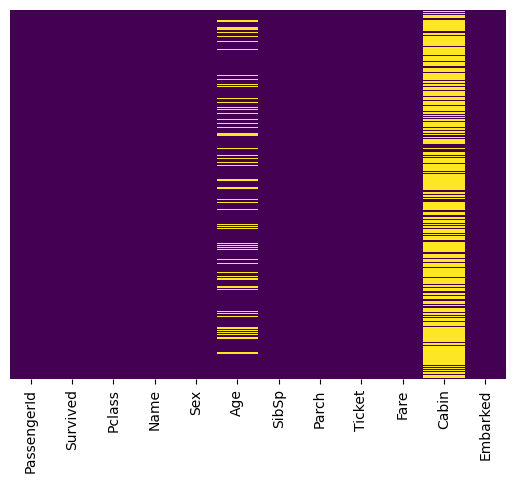

Let's analyse the <em>Age</em> distribution with the ticket class, <em>Pclass</em>:

<Axes: xlabel='Pclass', ylabel='Age'>

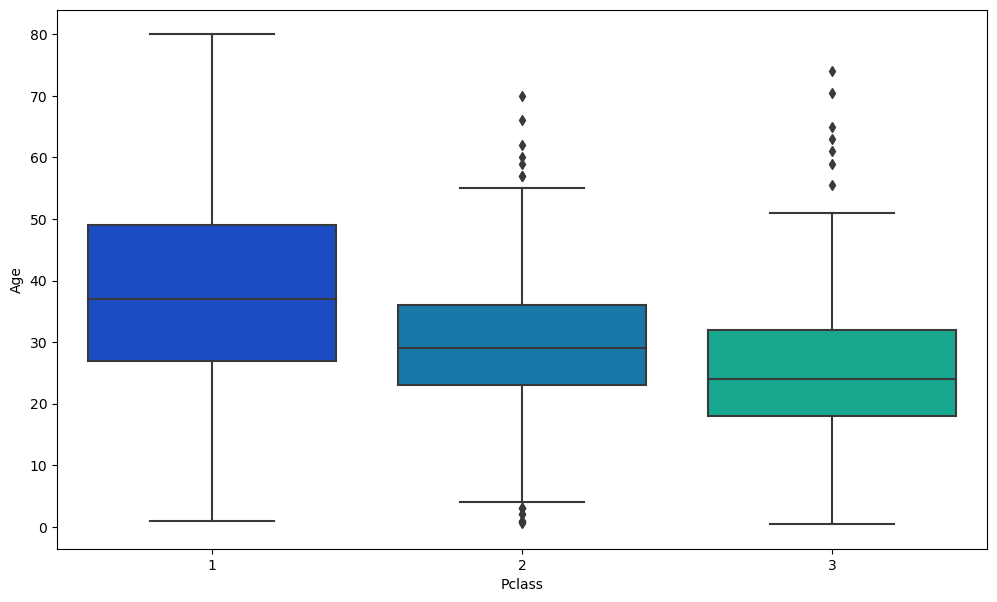

Let's impute the missing values in <em>Age</em> with the ticket class, <em>Pclass</em>:

In [11]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            

        elif Pclass == 2:
           

        else:
            

    else:
        

We will drop features: <em>Cabin</em>, <em>Sex</em>, <em>Embarked</em>, <em>Name</em> and <em>Ticket</em>

In [14]:
df.drop([...], axis = 1, inplace = True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


## Prepare the data frames

## Train Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, ...)

((622, 6), (622,), (267, 6), (267,))

## Models

Let's try different models. We will implement a Decision Tree and a Support Vector Machine for comparison with the Ensemble Learning Models.

### Decision Tree

Implement a <em>DT Classifier</em> with <em>max_depth</em> of 2 and a <em>random_state</em> of 2022. Then fit the created model:

In [19]:
dt_model = 

In [ ]:
dt_model.fit(...)

Obtain the accuracy of the model:

In [21]:
dt_score = dt_model.score(...)

In [22]:
print("Accuracy: %.2f%%" % (... * 100))

Accuracy: 69.29%


Obtain the predictions and print the <em>classification_report</em>:

In [23]:
dt_predictions = dt_model.predict(...)

In [24]:
print(classification_report(...))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       173
           1       0.56      0.56      0.56        94

    accuracy                           0.69       267
   macro avg       0.66      0.66      0.66       267
weighted avg       0.69      0.69      0.69       267



Save the model's accuracy in a dictionary:

In [25]:
results = {'DT': dt_score}

### Support Vector Machine



Implement a <em>SVM</em> with a <em>random_state</em> of 2022. Then fit the created model:

In [26]:
svm_model = 

In [ ]:
svm_model.fit(...)

Obtain the accuracy of the model:

In [28]:
svm_score = svm_model.score(...)

In [29]:
print("Accuracy: %.2f%%" % (... * 100))

Accuracy: 68.16%


Obtain the predictions and print the <em>classification_report</em>:

In [30]:
svm_predictions = svm_model.predict(...)

In [31]:
print(classification_report(...))

              precision    recall  f1-score   support

           0       0.68      0.97      0.80       173
           1       0.71      0.16      0.26        94

    accuracy                           0.68       267
   macro avg       0.70      0.56      0.53       267
weighted avg       0.69      0.68      0.61       267



Save the model's accuracy in the dictionary:

In [32]:
results['SVM'] = svm_score

Let's try some <em>Ensemble Learning</em> models.

### Bagging <em>(Bootstrap Aggregating)</em>

Implement a <em>StratifiedShuffleSplit</em> with <em>n_splits</em> of 10, <em>test_size</em> of 20 and a <em>random_state</em> of 2022:

In [33]:
sss = StratifiedShuffleSplit

Implement a <em>BaggingClassifier</em> with the previous <em>DT</em> model and <em>bootstrap</em> set <em>True</em>:

In [34]:
bg_model = BaggingClassifier

Implement a <em>GridSearchCV</em> with the <em>BaggingClassifier</em> model, <em>n_estimators</em> of [10, 40, 60, 80, 100, 160] as <em>parameters</em> and the <em>StratifiedShuffleSplit</em> as <em>cv</em>. Then fit the created model:

In [35]:
n_estimators = [...]

In [36]:
parameters = {'n_estimators': n_estimators}

In [37]:
grid_bg = GridSearchCV(estimator = ..., param_grid = ..., cv = ...)

In [ ]:
grid_bg.fit(...)

Obtain the <em>best_estimator</em>:

In [39]:
bst_bg_model = grid_bg.

In [40]:
print(bst_bg_model)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                   random_state=2022),
                  n_estimators=40)


Fit the best model:

In [ ]:
bst_bg_model.fit(...)

Obtain the accuracy of the best model:

In [42]:
bst_bg_score = bst_bg_model.score(...)

In [43]:
print("Accuracy: %.2f%%" % (... *100))

Accuracy: 71.54%


Obtain the predictions and print the <em>classification_report</em>:

In [44]:
bg_predictions = bst_bg_model.predict(...)

In [45]:
print(classification_report(...))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       173
           1       0.60      0.56      0.58        94

    accuracy                           0.72       267
   macro avg       0.69      0.68      0.68       267
weighted avg       0.71      0.72      0.71       267



Save the model's accuracy in the dictionary:

In [46]:
results['Bagg']= bst_bg_score

#### Random Forest

Implement a <em>RandomForestClassifier</em> with <em>bootstrap</em> set <em>False</em>, <em>max_depth</em> of 2 and <em>verbose</em> of 1. Then fit the created model:

In [47]:
rf_model = RandomForestClassifier

In [ ]:
rf_model.fit(...)

Obtain the accuracy of the model:

In [49]:
rf_score = rf_model.score(...)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [50]:
print("Accuracy: %.2f%%" % (... * 100))

Accuracy: 72.28%


Obtain the predictions and print the <em>classification_report</em>:

In [51]:
rf_predictions = rf_model.predict(...)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [52]:
print(classification_report(...))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       173
           1       0.62      0.54      0.58        94

    accuracy                           0.72       267
   macro avg       0.69      0.68      0.69       267
weighted avg       0.72      0.72      0.72       267



Save the model's accuracy in the dictionary:

In [53]:
results['RF'] = rf_score

### Boosting

#### Gradient Boosting

Implement a <em>GradientBoostingClassifier</em> with <em>n_estimators</em> of 100, <em>learning_rate</em> of 1.0, <em>max_depth</em> of 1 and <em>random_state</em> of 2022. Then fit the created model:

In [54]:
gbc_model = GradientBoostingClassifier

In [ ]:
gbc_model.fit(...)

Obtain the accuracy of the model:

In [56]:
gbc_score = gbc_model.score(...)

In [57]:
print("Accuracy: %.2f%%" % (... * 100))

Accuracy: 71.16%


Obtain the predictions and print the <em>classification_report</em>:

In [58]:
gbc_predictions = gbc_model.predict(...)

In [59]:
print(classification_report(...))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       173
           1       0.60      0.53      0.56        94

    accuracy                           0.71       267
   macro avg       0.68      0.67      0.67       267
weighted avg       0.71      0.71      0.71       267



Save the model's accuracy in the dictionary:

In [60]:
results['GB'] = gbc_score

#### XGBoost

Implement a <em>XGBClassifier</em> with <em>max_depth</em> of 1 and <em>objective</em> of <em>reg:squarederror</em>. Then fit the created model:

In [61]:
xgb_model = XGBClassifier

In [ ]:
xgb_model.fit(...)

Obtain the accuracy of the model:

In [63]:
xgb_score = xgb_model.score(...)

In [64]:
print("Accuracy: %.2f%%" % (... * 100))

Accuracy: 69.66%


Obtain the predictions and print the <em>classification_report</em>:

In [65]:
xgb_predictions = xgb_model.predict(...)

In [66]:
print(classification_report(...))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       173
           1       0.58      0.52      0.55        94

    accuracy                           0.70       267
   macro avg       0.66      0.66      0.66       267
weighted avg       0.69      0.70      0.69       267



Save the model's accuracy in the dictionary:

In [67]:
results['XGB'] = xgb_score

### Stacking

#### StackingClassifier

Implement a <em>StackingClassifier</em> with 3 <em>estimators</em> (DT, SVM and RF models) and <em>LogisticRegression</em> as <em>final_estimator</em>. Then fit the created model:

In [68]:
estimators = [("dt", ...), ("svm", ...), ("rf", ...)]

In [69]:
st_model = StackingClassifier

In [ ]:
st_model.fit(...)

Obtain the accuracy of the model:

In [71]:
st_score = st_model.score(...)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [72]:
print("Accuracy: %.2f%%" % (... * 100))

Accuracy: 71.91%


Obtain the predictions and print the <em>classification_report</em>:

In [73]:
st_predictions = st_model.predict(...)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [74]:
print(classification_report(...))

              precision    recall  f1-score   support

           0       0.76      0.84      0.79       173
           1       0.63      0.50      0.56        94

    accuracy                           0.72       267
   macro avg       0.69      0.67      0.68       267
weighted avg       0.71      0.72      0.71       267



Save the model's accuracy in the dictionary:

In [75]:
results['Stack']= st_score

### Max Voting

#### Majority Class Labels (Majority/Hard Voting)

Implement a <em>VotingClassifier</em> with 3 <em>estimators</em> (DT, SVM and RF models), <em>voting</em> of <em>hard</em> and <em>weights</em> of [2, 1, 2]. Then fit the created model:

In [76]:
hvt_model = VotingClassifier

In [ ]:
hvt_model.fit(...)

Obtain the accuracy for each model using <em>cross_val_score</em>:

In [78]:
for model, label in zip([...], ['dt', 'svm', 'rf', 'Ensemble']):
    ... = cross_val_score(model, X_test, y_test, scoring = 'accuracy', cv = 5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (hvt_score.mean(), hvt_score.std(), ...))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy: 0.69 (+/- 0.05) [dt]
Accuracy: 0.66 (+/- 0.04) [svm]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

Accuracy: 0.70 (+/- 0.06) [rf]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Accuracy: 0.69 (+/- 0.07) [Ensemble]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Obtain the accuracy of the max voted model:

In [79]:
hvt_score = hvt_model.score(...)
print("Accuracy: %.2f%%" % (... * 100))

Accuracy: 71.91%


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Obtain the predictions and print the <em>classification_report</em>:

In [80]:
hvt_predictions = hvt_model.predict(...)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [81]:
print(classification_report(...))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       173
           1       0.61      0.56      0.59        94

    accuracy                           0.72       267
   macro avg       0.69      0.68      0.69       267
weighted avg       0.71      0.72      0.72       267



Save the model's accuracy in the dictionary:

In [82]:
results['HVotW']= hvt_score

## Models accuracy comparison

Let's plot a bar chart with the accuracy of each created model:

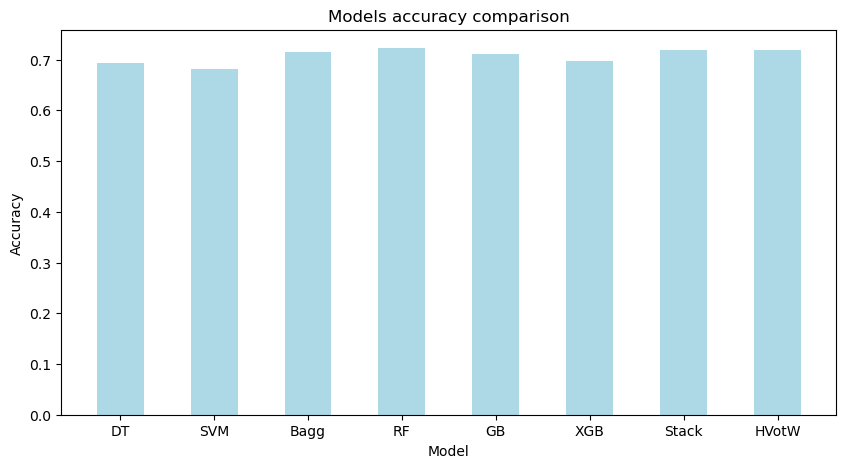

We can visualize the bars horizontally:

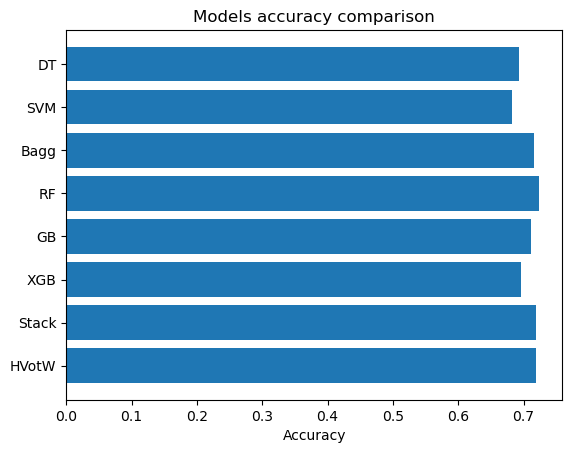

Or simply print the dictionary created with the results:

Models accuracy comparison
DT 	 0.69
SVM 	 0.68
Bagg 	 0.72
RF 	 0.72
GB 	 0.71
XGB 	 0.70
Stack 	 0.72
HVotW 	 0.72
